In [23]:
# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# To Train our data
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler, normalize

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (
                             log_loss,
                             precision_score,
                             recall_score)
from sklearn.model_selection import LeaveOneOut


# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,RandomizedSearchCV


In [24]:
import sys
sys.path.append("../scripts")
from ml_pipeline import run_train_pipeline,dvc_get_data
from db_api import Database_api

In [25]:
db_api = Database_api()

In [26]:
warehouse = db_api.get_db_data_from_table_name('mlready_warehouse')

2022-08-10 11:59:49,393:logger:successfully fetched the data


In [27]:
warehouse

,campaign_id,game_key,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,buy_rate_cpe,volume_agreed,gross_costbudget,agency_fee,percentage,net_cost,row_num,ER,CTR,TR
0,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
1,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298000+00:00,Thailand,www.wuxiaworld.com,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
2,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
3,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
4,l5kk3r3,adunit-facebook-conversational-commerce-phase-...,impression,300.0,300.0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047000+00:00,Thailand,www.prachachat.net,...,0.28,242185.0,67811.8,Percentage,15.0,57640.03,1,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422222,rom3zao,3c741855acd9576b4e311d5cd990ae77/ce493e9ed768f...,impression,300.0,250.0,b385e5s9,ca74860c-fa94-425b-b51a-9ef28ae7279e,2021-02-08 18:17:49.721000+00:00,United States,afk.guide,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029
422223,rom3zao,ccce5533b26203d07100376c394951a6/e69efe69bb576...,impression,300.0,250.0,s54usm6e,19618aa3-af95-44f2-beea-06958d0af730,2021-02-08 18:17:50.782000+00:00,United States,www.acommunaltable.com,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029
422224,rom3zao,676e0507f9e1ed8fa6880eafcf91547b/fee75db580219...,impression,300.0,250.0,aydslxzq,347bde1b-1b7b-4adf-8603-0dd1954466ee,2021-02-08 18:17:51.290000+00:00,United States,g1.globo.com,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029
422225,rom3zao,38534b16ec1e64274db67b5de478c86d/1184b78ee9795...,impression,300.0,250.0,18mljlwy,2440c057-02e7-4440-bcfb-15b113d1df18,2021-02-08 18:17:52.325000+00:00,United States,www.foxnews.com,...,0.40,531179.0,212471.6,Percentage,0.0,212471.60,1,13.8097,9.564359,11.687029


In [6]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(warehouse[['campaign_id' , 'ER']], warehouse['type'],
#                                                             test_size=0.3,shuffle=False)


In [7]:
# X_train.sort_values(by='campaign_id', ascending=False)

In [8]:
# X_test.sort_values(by='campaign_id', ascending=False)

In [28]:
warehouse = warehouse.sort_values(by='campaign_id', ascending=False)
# warehouse

In [29]:
choosen_df = warehouse[['ER' ,'gross_costbudget' , 'currency' , 'blackwhiteaudience_list_included','net_cost', 'percentage' , 'platform_os' , "buy_rate_cpe" , "geo_country" , "cost_centre" , "site_name"]]

In [30]:
choosen_df.dropna(inplace=True)
choosen_df

/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ER,gross_costbudget,currency,blackwhiteaudience_list_included,net_cost,percentage,platform_os,buy_rate_cpe,geo_country,cost_centre,site_name
211113,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,5.0,13.0,United States,USA,www.wholesomerecipebox.com
205704,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,5.0,13.0,United States,USA,parenting.firstcry.com
205709,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,word.tips
205708,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,chessmoba.us
205707,4.998925,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,newsinfo.inquirer.net
...,...,...,...,...,...,...,...,...,...,...,...
97373,14.682393,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.dailymotion.com
97374,14.682393,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.ebaumsworld.com
97375,14.682393,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.dailymotion.com
97376,14.682393,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.smartcarofamerica.com


In [31]:
y = choosen_df['ER'] #.apply(lambda x: 0 if x=='impression' else 1 if x=="first_dropped" else 2 if x=="click-through-event" else 0)
x = choosen_df.drop(columns=["ER"])
x

,gross_costbudget,currency,blackwhiteaudience_list_included,net_cost,percentage,platform_os,buy_rate_cpe,geo_country,cost_centre,site_name
211113,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,5.0,13.0,United States,USA,www.wholesomerecipebox.com
205704,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,5.0,13.0,United States,USA,parenting.firstcry.com
205709,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,word.tips
205708,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,chessmoba.us
205707,0.0,USD,Black/white/audience list will be provided later,0.0,0.0,6.0,13.0,United States,USA,newsinfo.inquirer.net
...,...,...,...,...,...,...,...,...,...,...
97373,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.dailymotion.com
97374,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.ebaumsworld.com
97375,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.dailymotion.com
97376,0.0,USD,Black/white/audience list included,0.0,15.0,6.0,0.3,United States,USA,www.smartcarofamerica.com


In [32]:
y

211113     4.998925
205704     4.998925
205709     4.998925
205708     4.998925
205707     4.998925
            ...    
97373     14.682393
97374     14.682393
97375     14.682393
97376     14.682393
101646    14.682393
Name: ER, Length: 422223, dtype: float64

In [14]:
model = RandomForestRegressor(n_estimators = 10, random_state = 42)
str(model)

'RandomForestRegressor(n_estimators=10, random_state=42)'

inside train pipeline
inside label encoder


2022-08-10 10:31:35,540:logger:successfully got catagorical columns
2022-08-10 10:31:36,450:logger:successfully got catagorical columns
2022-08-10 10:31:36,459:logger:successfully got numerical columns
2022-08-10 10:31:38,582:logger:RMSE Score: 6.186850728967282
2022-08-10 10:31:38,583:logger:R2_Squared: -0.32360487090499235
2022-08-10 10:31:38,584:logger:MAE Score: 5.019926361110263
2022-08-10 10:31:38,588:logger:Accuracy: 54.9 %.
2022-08-10 10:31:38,633:logger:feature importance plotted


Successfully registered model Random Forest with cleaned data_sixth_run_Sat-May-28-19:51:43-2022
Run - sixth_run is logged to Experiment - Random Forest with cleaned data


{'RMSE Score': 6.19, 'R2_Squared': -0.32, 'MAE Score': 5.02}

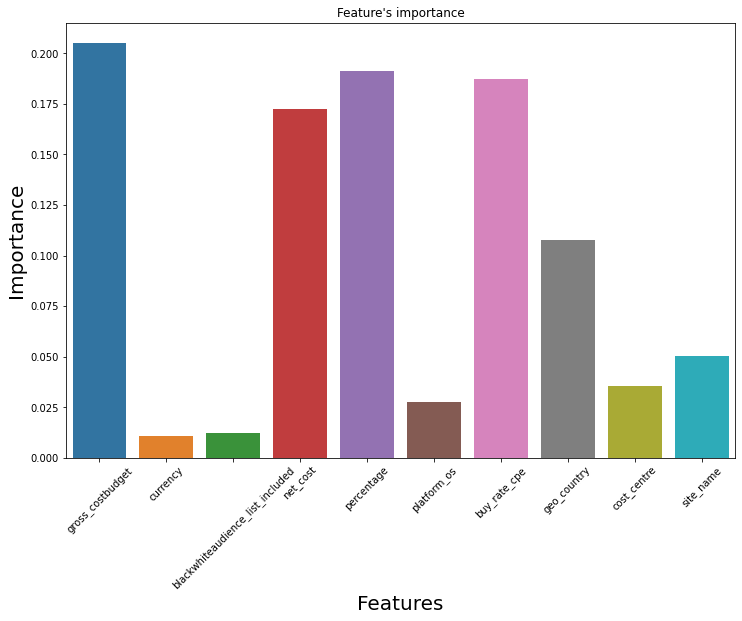

In [15]:
run_train_pipeline(model, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='sixth_run')

In [18]:
model = RandomForestRegressor(n_estimators=20)
random_grid = { 
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

inside train pipeline
inside label encoder


2022-08-10 10:33:00,280:logger:successfully got catagorical columns
2022-08-10 10:33:00,282:logger:successfully got catagorical columns
2022-08-10 10:33:00,289:logger:successfully got numerical columns


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=   5.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=   5.9s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10; total time=   6.1s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10; total time=   6.6s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10; total time=   6.9s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2; total time=   7.0s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2; total time=   8.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2; total time=   9.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=   4.7s
[CV] END bootstrap=False, max_depth=50, mi

2022-08-10 10:33:31,868:logger:RMSE Score: 6.282900031996556
2022-08-10 10:33:31,870:logger:R2_Squared: -0.36502114936079155
2022-08-10 10:33:31,871:logger:MAE Score: 5.155311458142363
2022-08-10 10:33:31,874:logger:Accuracy: 50.63 %.
2022-08-10 10:33:31,906:logger:feature importance plotted


Successfully registered model Random Forest with cleaned data_sixth_run_Sat-May-28-19:51:43-2022
Run - fine_tuned is logged to Experiment - Random Forest with cleaned data


{'RMSE Score': 6.28, 'R2_Squared': -0.37, 'MAE Score': 5.16}

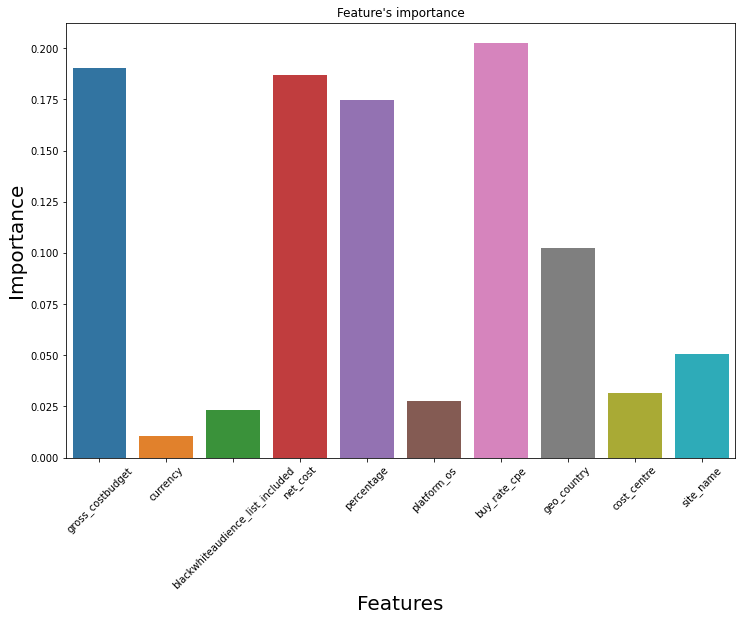

In [19]:
run_train_pipeline(rf_random, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='fine_tuned')

In [33]:
model = XGBClassifier()
str(model)

'XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,\n              colsample_bynode=None, colsample_bytree=None,\n              enable_categorical=False, gamma=None, gpu_id=None,\n              importance_type=None, interaction_constraints=None,\n              learning_rate=None, max_delta_step=None, max_depth=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              n_estimators=100, n_jobs=None, num_parallel_tree=None,\n              predictor=None, random_state=None, reg_alpha=None,\n              reg_lambda=None, scale_pos_weight=None, subsample=None,\n              tree_method=None, validate_parameters=None, verbosity=None)'

In [39]:
y_for_xg = pd.DataFrame(y)
y_for_xg['ER'] = y_for_xg['ER'].astype(int)
y_for_xg
run_train_pipeline(model, x, y_for_xg['ER'], 
                experiment_name='XGB with cleaned data',
                run_name='sixth_run')

inside train pipeline
inside label encoder


2022-08-10 12:05:45,954:logger:successfully got catagorical columns
2022-08-10 12:05:45,957:logger:successfully got catagorical columns
2022-08-10 12:05:45,964:logger:successfully got numerical columns
/home/hp/miniconda3/envs/airflow_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2022-08-10 12:07:47,893:logger:RMSE Score: 7.342560697525655
2022-08-10 12:07:47,901:logger:R2_Squared: -0.9596938979923741
2022-08-10 12:07:47,902:logger:MAE Score: 5.911081812942598
2022-08-10 12:07:47,906:logger:Accuracy: 33.51 %.
2022-08-10 12:07:47,907:logger:'XGBClassifier' object has no attribute 'best_estimator_'
2022-08-10 12:07:47,908:logger:'list' object has no attribute 'keys'
2022-08-10 12:07:47,909:logger:'NoneType' object has no attribute 'savefig'


Run - sixth_run is logged to Experiment - XGB with cleaned data


{'RMSE Score': 7.34, 'R2_Squared': -0.96, 'MAE Score': 5.91}